When we are using algorithms which depend on normal distribution, we need to check the distribution of the data
and try to transform the distribution to normal form
##### Hence we first check their distribution and apply power transformation

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [21]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [22]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
# checking the null values in the features.
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [33]:
# filling with the mean values.
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [34]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [37]:
# extracting the independent and dependent features.
X = df.iloc[:, 1:3] # all rows and columns = 1,2
y = df.iloc[:,0] # all rows but only 0th column

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [40]:
import warnings
warnings.filterwarnings('ignore')

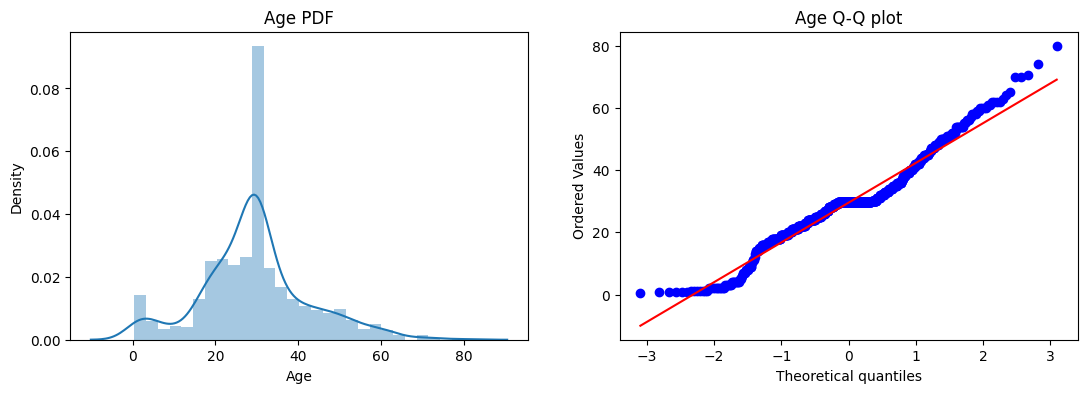

In [42]:
# checking the distribution plot of features.
plt.figure(figsize=(13,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist = 'norm', plot=plt)
plt.title('Age Q-Q plot')
plt.show()

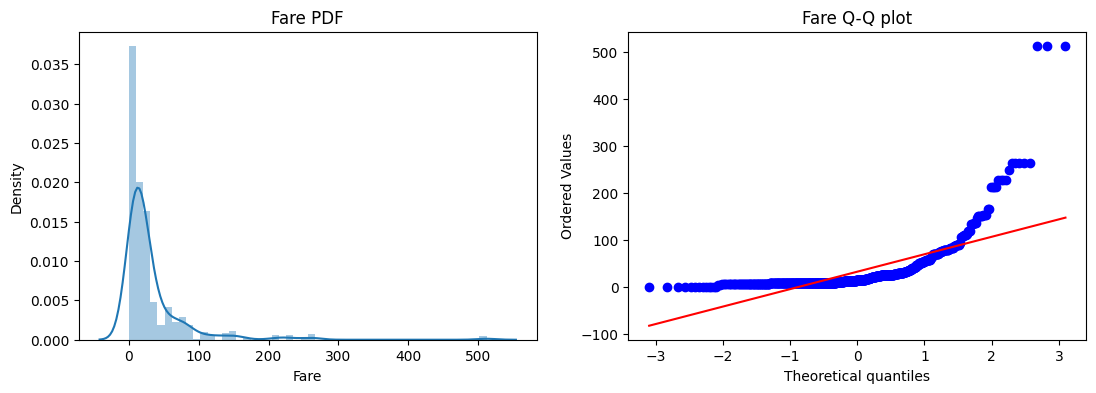

In [43]:
plt.figure(figsize=(13,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist = 'norm', plot=plt)
plt.title('Fare Q-Q plot')
plt.show()

In [44]:
# right skewed--> log transform will be used.

# model training without transformation

In [46]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [48]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_pred, y_test))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6480446927374302


In [50]:
# Applying transformation.
trf = FunctionTransformer(func  = np.log1p)

In [51]:
X_train_trans = trf.fit_transform(X_train)
X_test_trans = trf.transform(X_test)

In [52]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_trans, y_train)
clf2.fit(X_train_trans, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score (y_test, y_pred2))

Accuracy LR 0.7374301675977654
Accuracy DT 0.5865921787709497


In [53]:
# we see that the accuracy of the decision tree didn't improve on changing the data distribution to normal.
# For Logistic regression it changed.

In [54]:
# the improved accuracy may be misleading so let's do cross validation to check the overall accuracy on different splits.
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring = 'accuracy', cv = 10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring = 'accuracy', cv = 10)))

LR 0.678027465667915
DT 0.653258426966292


In [55]:
# We see that the accuracy of LR is lesser now but better than the 1st one
# For DT we see almost similar result as 1st one.

# custom function transformer

In [64]:
def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transform')
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist='norm', plot=plt)
    plt.title('Fare After Transform')
    plt.show()
    
    

Accuracy 0.6442446941323345


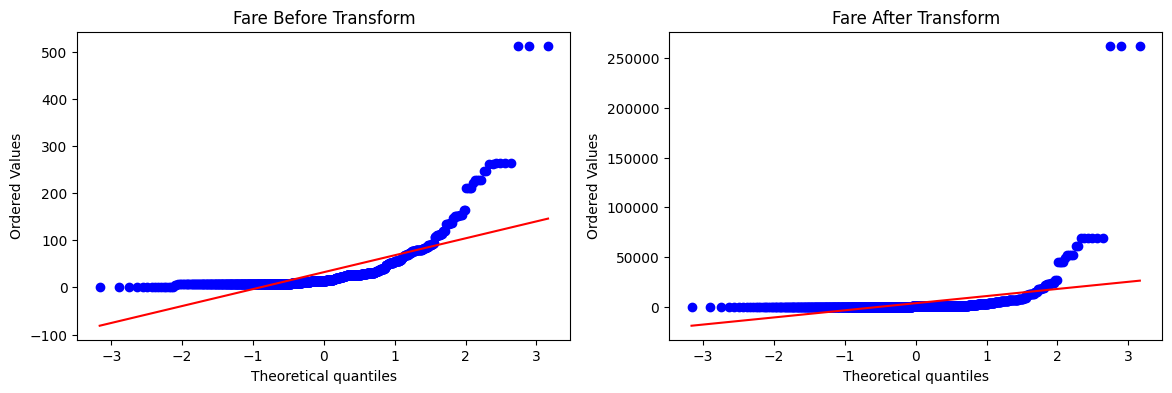

In [74]:
# argument--> your transforming function eg. sine, cos, 1/x, x^2, log etc
apply_transform(lambda x: x**2)

Till now we did the log, square, other functional transformation

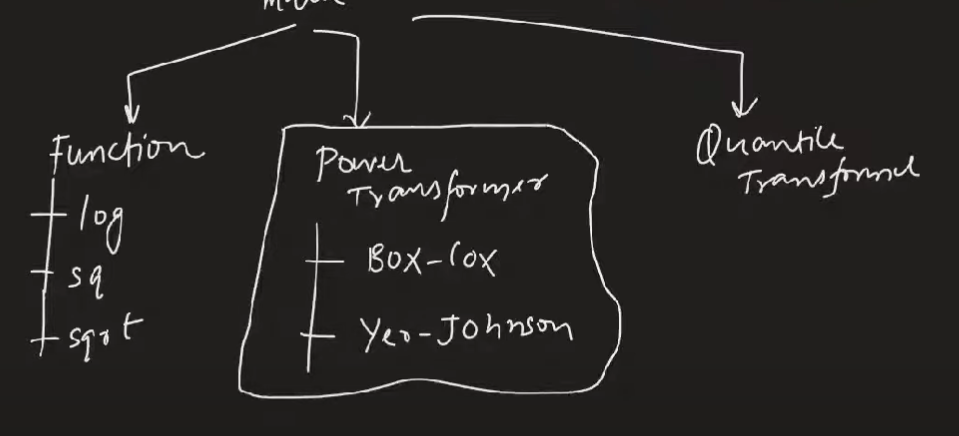

Now we'll do power transformer

In [75]:
df = pd.read_csv('concrete_data.csv')

In [76]:
df.head(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [77]:
df.shape

(1030, 9)

In [78]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [80]:
#df.describe()

In [96]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [100]:
# applying regression without any transformation.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.6275531792314848

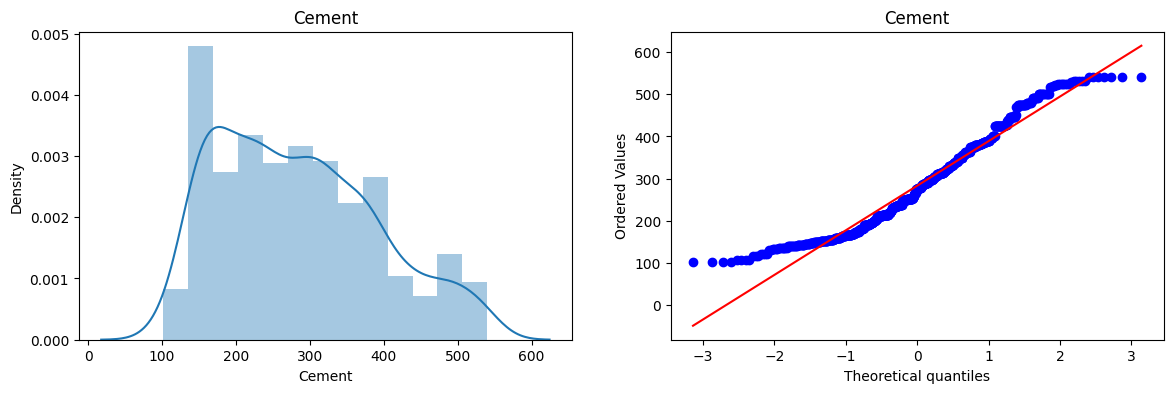

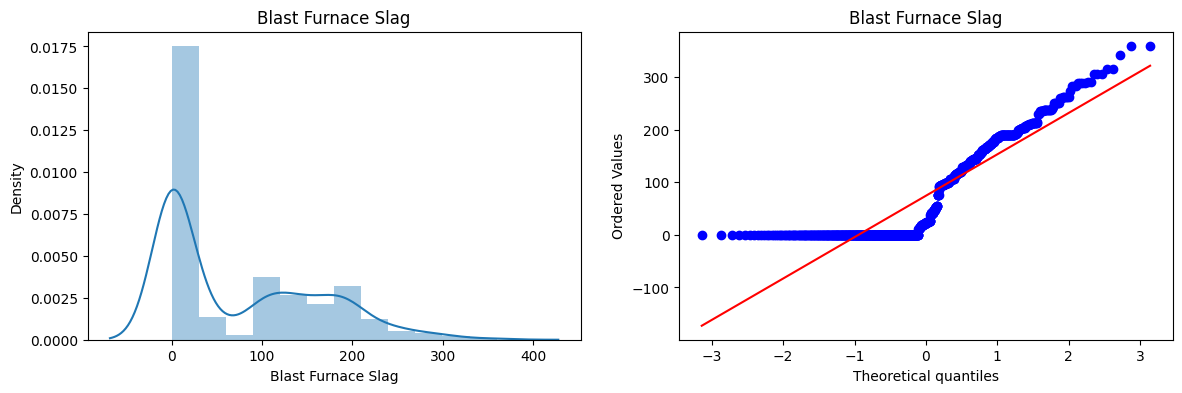

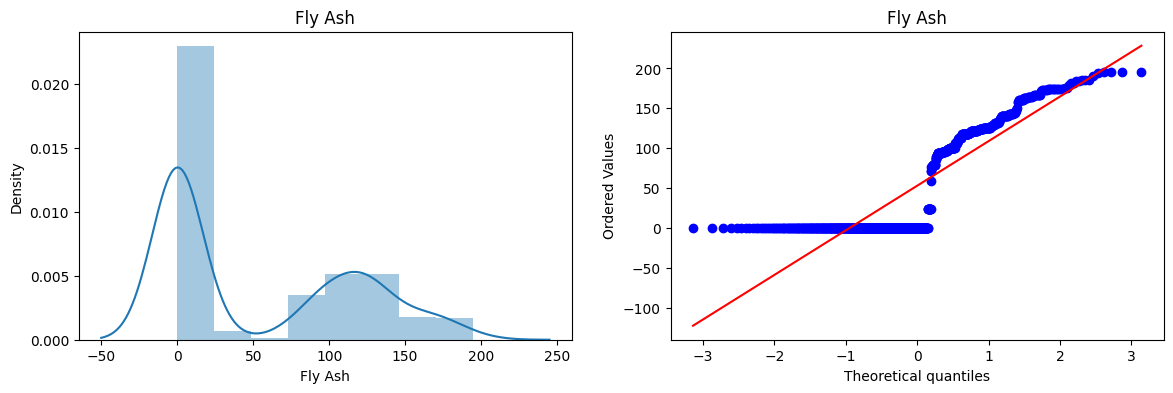

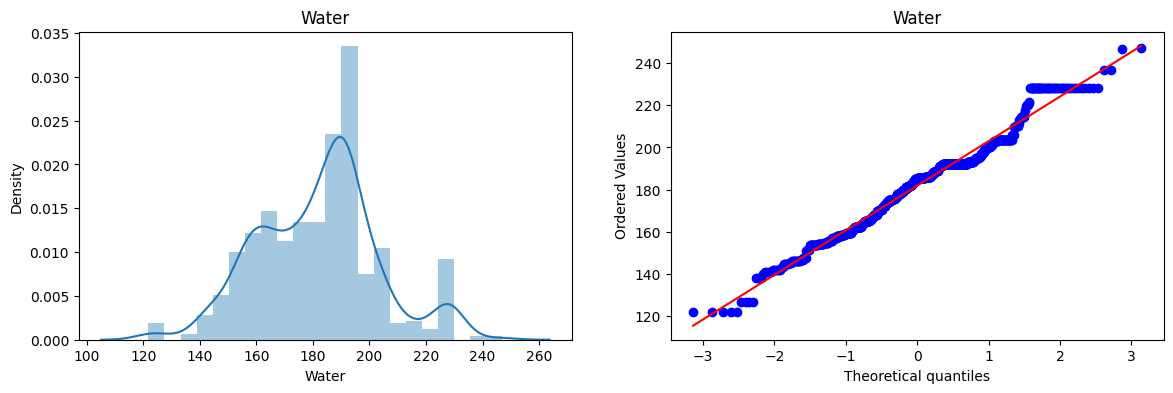

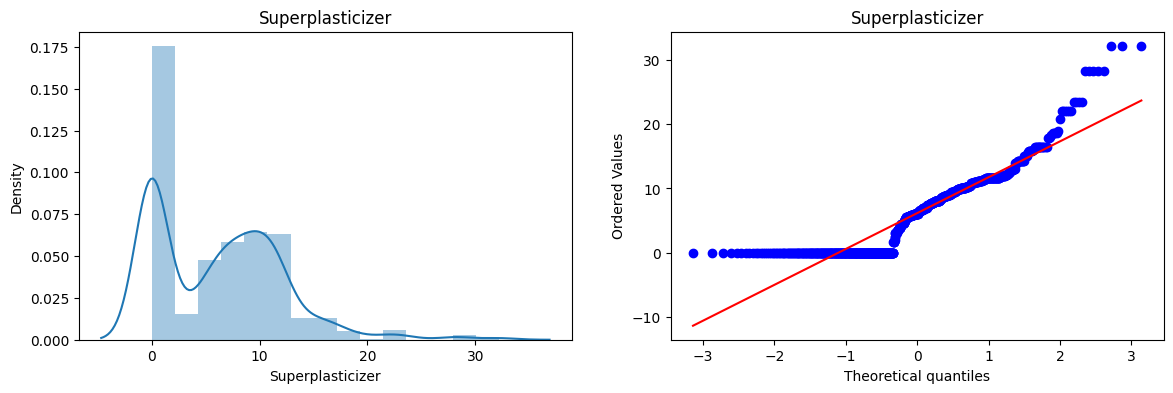

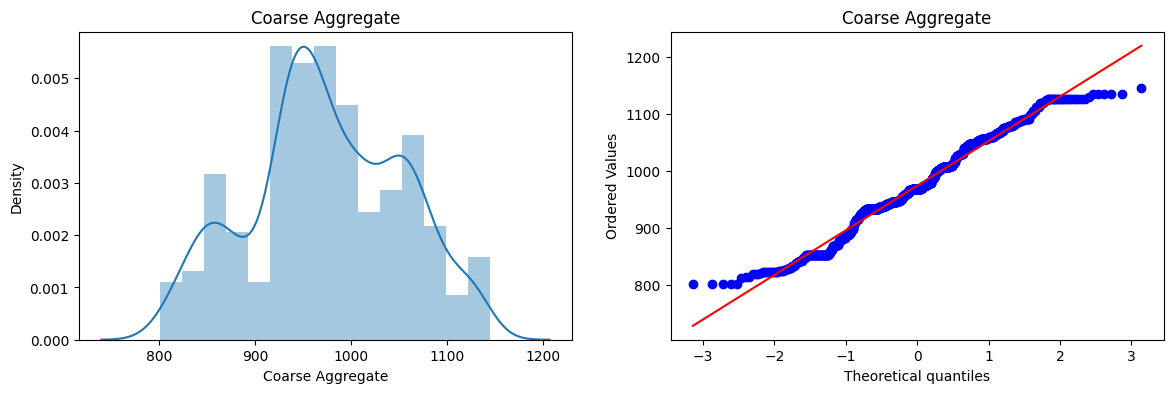

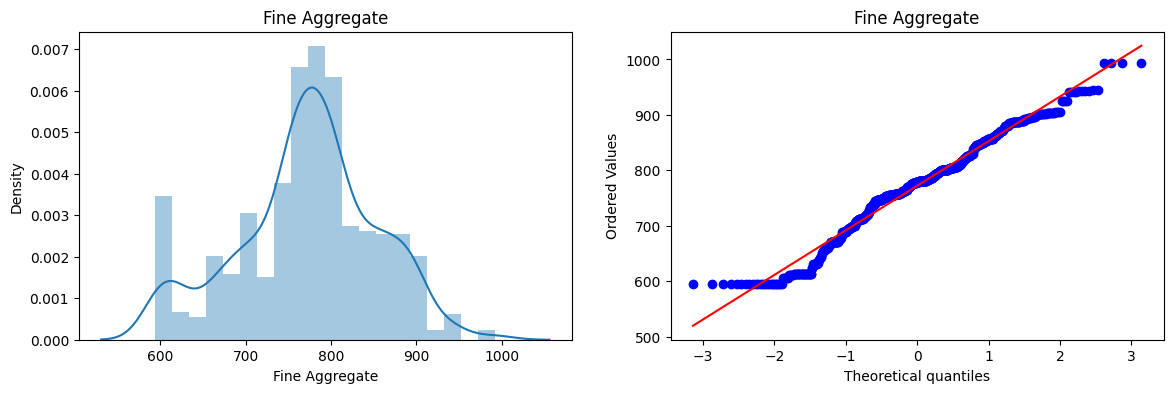

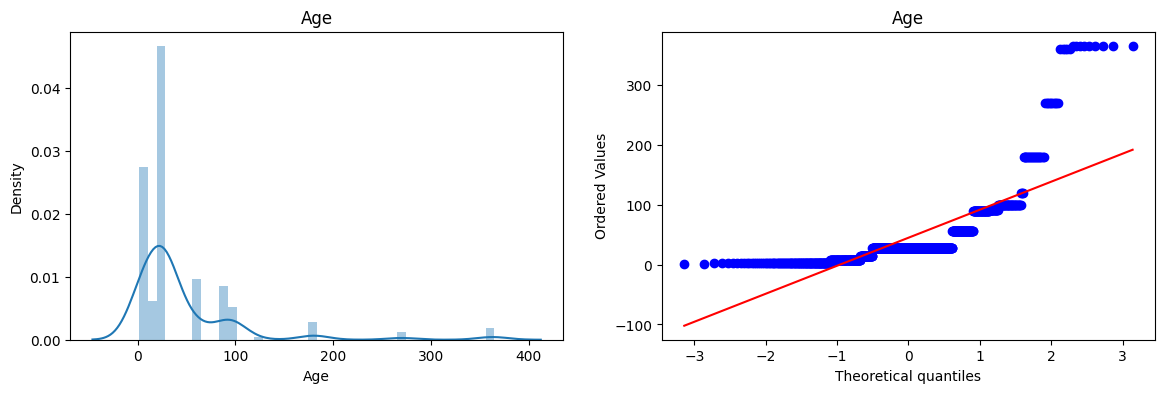

In [101]:
# Now checking the distribution of all the columns 
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(col)
    
    plt.show()

In [104]:
from sklearn.preprocessing import PowerTransformer
# apply power transform feature-wise to make data more Gaussian-like

In [105]:
## Applying Box-Cox Transform
# box-cox don't handle 0 data value, so we added small value.
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test + 0.000001)
pd.DataFrame({'cols': X_train.columns,  'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [106]:
# Box-cox lambdas basically transform the columns:- (columns)^(lambda)

In [107]:
# applying the linear regression on transformed data.
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred2 = lr.predict(X_test_transformed)
r2_score(y_test, y_pred2)

0.8047825006181188

In [126]:
# Verifying the r2 score using cross-validation
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed, y, scoring='r2'))

0.6658537942219862

In [127]:
# accuracy increased by 4%

In [128]:
# Apply Yeo-Johnson transform
pt1 = PowerTransformer() # by default its Yeo-Johnson.
X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_transformed2, y_train)

y_pred3 = lr.predict(X_test_transformed)
print(r2_score(y_test, y_pred3))


0.8123769979169441


In [129]:
pd.DataFrame({'cols': X_train.columns, 'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [131]:
# applying the cross val score.
pt3 = PowerTransformer()
X_transformed2 = pt3.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed2, y, scoring='r2'))

0.6834625134285748

In [132]:
# similarly we can plot them before and after the trnasformation.

In [133]:
# side by side lambdas
pd.DataFrame({'cols':X_train.columns, 'box_cox_lambdas':pt.lambdas_, 'Yeo-johnson-lambdas': pt1.lambdas_})

,cols,box_cox_lambdas,Yeo-johnson-lambdas
0,Cement,0.172271,0.174348
1,Blast Furnace Slag,0.022924,0.015715
2,Fly Ash,-0.028797,-0.161447
3,Water,0.809568,0.771307
4,Superplasticizer,0.087911,0.253935
5,Coarse Aggregate,1.129168,1.130050
6,Fine Aggregate,1.829625,1.783100
7,Age,0.048975,0.019885
